In [1]:
import csv
import json
import pandas as pd
from datetime import datetime
import numpy as np
from collections import Counter


import warnings
warnings.filterwarnings("ignore")


localFolder = "../data_2019_processed/"
baseFolder = "../../Dataset_ECUADOR_2019/"

In [2]:
# Dataframe of all datasets
# initialize list of lists
datasets = [['0Jf4TH9Zzse0Z1Jjh7SnTOe2MMzeSnFi7feTnkG6vgs'],
            ['0tdmm6rwW3KquQ73ATYYJ5JkpMtvbppJ0VzA2GExdA'], 
            ['2cyV53lVyUtlMj0BRwilEWtYJwUiviYoL48cZBPBq0'], 
            ['2J22RukYnEbKTk7t+iUVDBkorcyL5NKN6TrLe89ys'], 
            #['5FLZBTVAPwdq9QezHE2sVCJIs7p+r6mCemA2gp9jATk'], #does not have the file
            ['7EYF5I04EVqisUJCVNHlqn77UAuOmwL2Dahxd3cA'], 
            ['a9Qgj8ENWrHvl9QqlXcIPKmyGMKgbfHk9Dbqon1HQP4'], 
            ['ae4JJBZDycEcY8McJF+3BxyvZ1619y03BNdCxzpZTc'], 
            ['Ch3u5Oaz96VSrQbf0z31X6jEIbeIekkC0mwPzCdeJ1U'], 
            ['CH8f0yZkZL13zWuE9ks1CkVJRVrr+jsGdUXHrZ6YeA'], 
            ['DHO1K4jgiwZJOfQTrxvKE2vn7hkjamigroGD5IaeRc'], 
            #['DHPqzSqSttiba1L3BD1cptNJPjSxZ8rXxF9mY3za6WA'], #does not have the file
            ['dQEFscjqnIlug8Tgq97JohhSQPG2DEOWJqS86wCrcY'], 
            ['HFvs2CohmhHte+AaCzFasjzegGzxZKPhkrX23iI6Xo'], 
            ['jgB9E8v3Z6PKdTRTCMAijBllA9YEMtrmHbe4qsbmJWw'], 
            ['JkY++R7E8myldLN3on6iQ78Ee78zCbrLuggfwGju3I'], 
            ['K4SLohf+TN1Ak8Dn8iE3Lme7rEMPISfppB2sXfHX8'], 
            ['oGaWetJJJEWHuvYdWYo826SQxfhCExVVQ2da8LE1Y7Q'], 
            ['pyt24oiDAHsmgWMvkFKz2fn2pwcHiXchd6KchLM'], 
            # ['PZCf1nfvhR+6fk+7+sPNMYOgb8BAMmtQtfoRS83Suc'], #does not have the file
            ['QUNCATForxzK0HHw46LrGOMWh0eVA8Y5XWEiUXX+cQ'], 
            ['rIl2UK9+bQ+tzpFdbJAdbBxEa5GbgrgC030yEaENLw'], 
            ['RoBW3cDOO9wWRMPO2twQff83MPc+OXn6gJ+a1DafreI'], 
            ['SH3kQeyd5volraxw8vOyhlowNqWBPr1IJ9URNXUL4'], 
            ['VVpwFNMrEglveh6MDN8lrRzTy5OwzglD4FURfM4A2is'], 
            ['Wa1mcNmbh66S7VS6GIzyfCFMD3SGhbtDQyFP1ywJEsw'], 
            ['XCKRE0BWRHxfP1kZIihgtT+jUjSp2GE8v5ZlhcIhVmA'], 
            ['YI5Y79K6GXqAUoGP6PNyII8WKlAoel4urDxWSVVOvBw'], 
            ['ypklj+8GJ15rOIH1lpKQtFJOuK+VdvyCuBPqhY3aoM'], 
            ['ZSsAZ0Pq+MCqFrnjsRFn5Ua09pMCVaOV9c8ZuYb7XQY']]
  
# Create the pandas DataFrame
folders = pd.DataFrame(datasets, columns=['folder'])

#folders

In [63]:
timestamp = 0
count_24_plus, count_12_24_plus, count_12_minus, count_0 = 0,0,0,0
# analyse the forms
allData = pd.DataFrame()
for indexFolder, folder in folders.iterrows():
   
    dataFLabel = pd.read_csv(localFolder+"form/sleep_form_"+folder['folder']+"_treated.csv",
                   delimiter=',', encoding="utf8")
    originalFLabel = pd.read_csv(baseFolder+folder['folder']+"/sleep_form_"+folder['folder']+".csv",
                   delimiter=',', encoding="utf8")
    
    count_24_plus = count_24_plus + dataFLabel[dataFLabel['time_sleeping_hs']>24].shape[0]
    count_12_24_plus = count_12_24_plus + (dataFLabel[dataFLabel['time_sleeping_hs'] > 12 ].shape[0]-dataFLabel[dataFLabel['time_sleeping_hs']>24].shape[0])
    count_12_minus = count_12_minus + dataFLabel[dataFLabel['time_sleeping_hs'] <= 12].shape[0]
    count_0 = count_0 + dataFLabel[dataFLabel['time_sleeping_hs'] <= 0].shape[0]
                                 
    print(folder['folder'])
    print("Original Count: ",originalFLabel.shape[0])
    print("New Count: ",dataFLabel.shape[0])
    print("Time sleep: ",dataFLabel['time_sleeping_hs'].max(),dataFLabel['time_sleeping_hs'].min(),dataFLabel['time_sleeping_hs'].mean())
    print("Sleep variability",)
    print("Count > 24:",dataFLabel[dataFLabel['time_sleeping_hs']>24].shape[0])
    print("Count <= 24 and > 12:",(dataFLabel[dataFLabel['time_sleeping_hs'] > 12 ].shape[0]-dataFLabel[dataFLabel['time_sleeping_hs']>24].shape[0]))
    print("Count <= 12:",dataFLabel[dataFLabel['time_sleeping_hs'] <= 12].shape[0])
    print("Count <= 0:",dataFLabel[dataFLabel['time_sleeping_hs'] <= 0].shape[0])
    print()  
    
        
                                  

0Jf4TH9Zzse0Z1Jjh7SnTOe2MMzeSnFi7feTnkG6vgs
Original Count:  33
New Count:  26
Time sleep:  20.75333333333333 2.5 6.80219017094017
Sleep variability
Count > 24: 0
Count <= 24 and > 12: 2
Count <= 12: 24
Count <= 0: 0

0tdmm6rwW3KquQ73ATYYJ5JkpMtvbppJ0VzA2GExdA
Original Count:  31
New Count:  22
Time sleep:  22.50277777777778 2.5133333333333336 8.58574494949495
Sleep variability
Count > 24: 0
Count <= 24 and > 12: 4
Count <= 12: 18
Count <= 0: 0

2cyV53lVyUtlMj0BRwilEWtYJwUiviYoL48cZBPBq0
Original Count:  48
New Count:  30
Time sleep:  16.0 1.0 5.175129629629629
Sleep variability
Count > 24: 0
Count <= 24 and > 12: 1
Count <= 12: 29
Count <= 0: 0

2J22RukYnEbKTk7t+iUVDBkorcyL5NKN6TrLe89ys
Original Count:  50
New Count:  21
Time sleep:  33.004444444444445 4.0 14.673769841269843
Sleep variability
Count > 24: 6
Count <= 24 and > 12: 1
Count <= 12: 14
Count <= 0: 0

7EYF5I04EVqisUJCVNHlqn77UAuOmwL2Dahxd3cA
Original Count:  15
New Count:  14
Time sleep:  31.511111111111116 3.262222222222222 

In [64]:
print("Status geral")
print("Count > 24:",count_24_plus)
print("Count <= 24 and > 12:",count_12_24_plus)
print("Count <= 12:",count_12_minus)
print("Count <= 0:",count_0)
print("total:",(count_0+count_12_minus+count_12_24_plus+count_24_plus))
print()  

Status geral
Count > 24: 46
Count <= 24 and > 12: 53
Count <= 12: 533
Count <= 0: 0
total: 632



In [65]:
dsMetrics = pd.read_csv("result_trad_MPL_unb_batch_size_32.csv")
print(dsMetrics.columns)


dsMetrics[['NN_type', 'units', 'epochs', 'batch_size', 'window_size','class', 'accuracy', 'precision', 'recall', 'f1_score','cohen_kappa_score', 'roc_auc_score']]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'window_size',
       'time_step_shift', 'start_time', 'end_time', 'time_s', 'time_m',
       'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,window_size,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score
0,MPL,16-8,5,32,-1,awake,0.737545,0.789955,0.856623,0.821939,0.326106,0.708504
1,MPL,16-8,5,32,-1,asleep,0.737545,0.565193,0.450016,0.501071,0.326106,0.708504
2,MPL,16-8,5,32,-1,avg,0.737545,0.677574,0.653320,0.661505,0.326106,0.708504
3,MPL,16-8,15,32,-1,awake,0.750497,0.787068,0.887184,0.834133,0.338047,0.716647
4,MPL,16-8,15,32,-1,asleep,0.750497,0.606832,0.420449,0.496733,0.338047,0.716647
5,MPL,16-8,15,32,-1,avg,0.750497,0.696950,0.653816,0.665433,0.338047,0.716647
6,MPL,16-8,30,32,-1,awake,0.744870,0.783652,0.882980,0.830356,0.323355,0.715221
7,MPL,16-8,30,32,-1,asleep,0.744870,0.592821,0.411386,0.485713,0.323355,0.715221
8,MPL,16-8,30,32,-1,avg,0.744870,0.688236,0.647183,0.658035,0.323355,0.715221
9,MPL,16-8,50,32,-1,awake,0.741371,0.789029,0.865744,0.825608,0.329456,0.710919


<AxesSubplot: xlabel='epochs'>

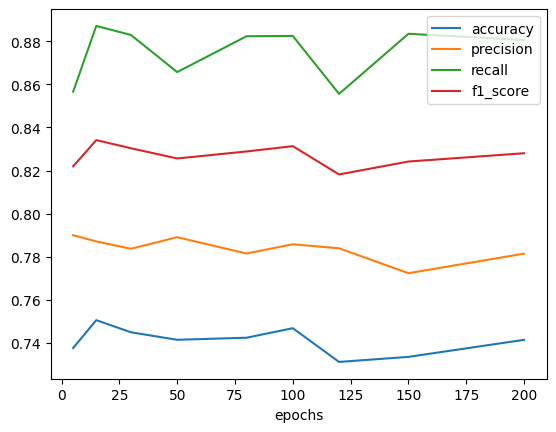

In [66]:
metrics = ["epochs","accuracy","precision","recall","f1_score"]
dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "awake"]
lines = dfMetricsClass[metrics].plot.line(x='epochs')

lines

<AxesSubplot: xlabel='epochs'>

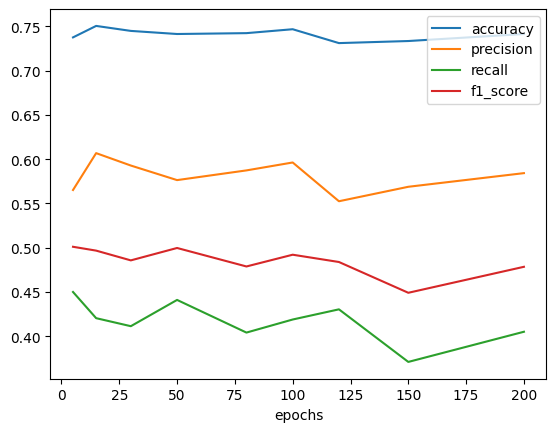

In [67]:
metrics = ["epochs","accuracy","precision","recall","f1_score"]
dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
lines = dfMetricsClass[metrics].plot.line(x='epochs')

lines

<AxesSubplot: xlabel='epochs'>

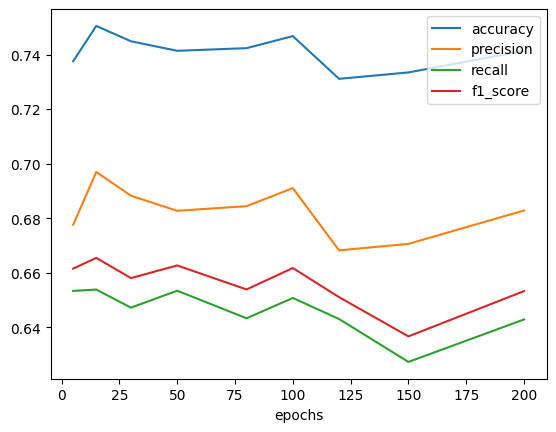

In [68]:
metrics = ["epochs","accuracy","precision","recall","f1_score"]
dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "avg"]
lines = dfMetricsClass[metrics].plot.line(x='epochs')

lines

<AxesSubplot: xlabel='epochs'>

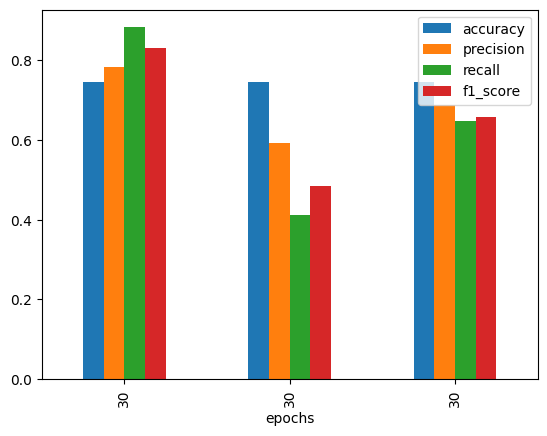

In [69]:
metrics = ["epochs","accuracy","precision","recall","f1_score"]
dfMetricsClass = dsMetrics.loc[dsMetrics['epochs'] == 30]
lines = dfMetricsClass[metrics].plot.bar(x='epochs')

lines

In [70]:
metrics = ['class',"epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

ss1 = ss.loc[ss['accuracy'] == ss['accuracy'].max()]
ss1

,NN_type,units,epochs,batch_size,window_size,time_step_shift,start_time,end_time,time_s,time_m,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
5,MPL,16-8,15,32,-1,-1,2023-10-04 17:27:21.711061,2023-10-04 17:31:28.641478,246.930417,4.115507,...,0.69695,0.653816,0.665433,0.338047,0.716647,NaN,NaN,NaN,NaN,NaN


In [90]:
metrics = ['class',"epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dfMetricsClass.loc[dsMetrics['class'] == "avg"]

ss1 = ss.loc[ss['cohen_kappa_score'] == ss['cohen_kappa_score'].max()]
ss1

,NN_type,units,epochs,batch_size,window_size,time_step_shift,start_time,end_time,time_s,time_m,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
8,MPL,16-8,30,32,-1,-1,2023-10-04 17:31:29.566337,2023-10-04 17:39:40.854945,491.288608,8.188143,...,0.688236,0.647183,0.658035,0.323355,0.715221,NaN,NaN,NaN,NaN,NaN


In [72]:
dsMetrics.loc[dsMetrics['epochs'] == 30][metrics]

,class,epochs,accuracy,precision,recall,f1_score
6,awake,30,0.74487,0.783652,0.882980,0.830356
7,asleep,30,0.74487,0.592821,0.411386,0.485713
8,avg,30,0.74487,0.688236,0.647183,0.658035


In [73]:
dsMetrics = pd.read_csv("result_trad_MPL_smote_batch_size_32.csv")
print(dsMetrics.columns)


dsMetrics[['NN_type', 'units', 'epochs', 'batch_size', 'window_size','class', 'accuracy', 'precision', 'recall', 'f1_score','cohen_kappa_score', 'roc_auc_score']]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'window_size',
       'time_step_shift', 'start_time', 'end_time', 'time_s', 'time_m',
       'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,window_size,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score
0,MPL,16-8,5,32,-1,awake,0.741875,0.783381,0.877664,0.827847,0.318797,0.714552
1,MPL,16-8,5,32,-1,asleep,0.741875,0.583592,0.413994,0.484376,0.318797,0.714552
2,MPL,16-8,5,32,-1,avg,0.741875,0.683486,0.645829,0.656112,0.318797,0.714552
3,MPL,16-8,15,32,-1,awake,0.742861,0.786402,0.873670,0.827742,0.326286,0.719270
4,MPL,16-8,15,32,-1,asleep,0.742861,0.583305,0.427006,0.493065,0.326286,0.719270
5,MPL,16-8,15,32,-1,avg,0.742861,0.684853,0.650338,0.660404,0.326286,0.719270
6,MPL,16-8,30,32,-1,awake,0.751416,0.791302,0.880757,0.833637,0.347662,0.720659
7,MPL,16-8,30,32,-1,asleep,0.751416,0.603969,0.439106,0.508509,0.347662,0.720659
8,MPL,16-8,30,32,-1,avg,0.751416,0.697636,0.659931,0.671073,0.347662,0.720659
9,MPL,16-8,50,32,-1,awake,0.730428,0.772334,0.877434,0.821536,0.279833,0.703154


In [74]:
metrics = ['class',"epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

ss1 = ss.loc[ss['accuracy'] == ss['accuracy'].max()]
ss1

,NN_type,units,epochs,batch_size,window_size,time_step_shift,start_time,end_time,time_s,time_m,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
8,MPL,16-8,30,32,-1,-1,2023-10-06 12:52:05.361639,2023-10-06 13:00:33.674827,508.313188,8.471886,...,0.697636,0.659931,0.671073,0.347662,0.720659,NaN,NaN,NaN,NaN,NaN


In [75]:
dsMetrics.loc[dsMetrics['epochs'] == 30][metrics]

,class,epochs,accuracy,precision,recall,f1_score
6,awake,30,0.751416,0.791302,0.880757,0.833637
7,asleep,30,0.751416,0.603969,0.439106,0.508509
8,avg,30,0.751416,0.697636,0.659931,0.671073


In [76]:
dsMetrics = pd.read_csv("result_trad_LSTM_smote_batch_size_32_window_4-1.csv")
print(dsMetrics.columns)


dsMetrics[['NN_type', 'units', 'epochs', 'batch_size', 'window_size','class', 'accuracy', 'precision', 'recall', 'f1_score','cohen_kappa_score', 'roc_auc_score']]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'window_size',
       'time_step_shift', 'start_time', 'end_time', 'time_s', 'time_m',
       'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,window_size,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score
0,LSTM,128,5,32,4,awake,0.728085,0.728409,0.981401,0.836188,0.129631,0.696157
1,LSTM,128,5,32,4,asleep,0.728085,0.721551,0.116380,0.200432,0.129631,0.696157
2,LSTM,128,5,32,4,avg,0.728085,0.724980,0.548891,0.518310,0.129631,0.696157
3,LSTM,128,15,32,4,awake,0.719759,0.721671,0.982712,0.832201,0.090706,0.675248
4,LSTM,128,15,32,4,asleep,0.719759,0.670068,0.084785,0.150524,0.090706,0.675248
5,LSTM,128,15,32,4,avg,0.719759,0.695870,0.533748,0.491362,0.090706,0.675248
6,LSTM,128,30,32,4,awake,0.735328,0.734987,0.978560,0.839463,0.165282,0.650345
7,LSTM,128,30,32,4,asleep,0.735328,0.740811,0.147975,0.246677,0.165282,0.650345
8,LSTM,128,30,32,4,avg,0.735328,0.737899,0.563268,0.543070,0.165282,0.650345
9,LSTM,128,50,32,4,awake,0.728300,0.727924,0.983320,0.836564,0.127428,0.711511


In [77]:
metrics = ['class',"epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

ss1 = ss.loc[ss['accuracy'] == ss['accuracy'].max()]
ss1

,NN_type,units,epochs,batch_size,window_size,time_step_shift,start_time,end_time,time_s,time_m,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
14,LSTM,128,80,32,4,1,2023-10-07 04:12:45.014511,2023-10-07 05:48:07.083932,5722.069421,95.367824,...,0.718579,0.57894,0.570735,0.200226,0.685452,NaN,NaN,NaN,NaN,NaN


In [78]:
dsMetrics.loc[dsMetrics['epochs'] == 80][metrics]

,class,epochs,accuracy,precision,recall,f1_score
12,awake,80,0.738813,0.742748,0.964816,0.839342
13,asleep,80,0.738813,0.694409,0.193063,0.302127
14,avg,80,0.738813,0.718579,0.578940,0.570735


In [79]:
dsMetrics = pd.read_csv("result_trad_LSTM_smote_batch_size_32_window_2-1.csv")
print(dsMetrics.columns)


dsMetrics[['NN_type', 'units', 'epochs', 'batch_size', 'window_size','class', 'accuracy', 'precision', 'recall', 'f1_score','cohen_kappa_score', 'roc_auc_score']]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'window_size',
       'time_step_shift', 'start_time', 'end_time', 'time_s', 'time_m',
       'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,window_size,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score
0,LSTM,128,5,32,2,awake,0.718281,0.717337,0.992829,0.832894,0.066133,0.706772
1,LSTM,128,5,32,2,asleep,0.718281,0.761672,0.055339,0.103181,0.066133,0.706772
2,LSTM,128,5,32,2,avg,0.718281,0.739505,0.524084,0.468037,0.066133,0.706772
3,LSTM,128,15,32,2,awake,0.726873,0.732153,0.967825,0.833653,0.146158,0.714654
4,LSTM,128,15,32,2,asleep,0.726873,0.651210,0.145056,0.237262,0.146158,0.714654
5,LSTM,128,15,32,2,avg,0.726873,0.691682,0.556440,0.535458,0.146158,0.714654
6,LSTM,128,30,32,2,awake,0.737230,0.742429,0.962237,0.838161,0.197514,0.684896
7,LSTM,128,30,32,2,asleep,0.737230,0.680163,0.193914,0.301789,0.197514,0.684896
8,LSTM,128,30,32,2,avg,0.737230,0.711296,0.578076,0.569975,0.197514,0.684896
9,LSTM,128,50,32,2,awake,0.732352,0.745003,0.944938,0.833144,0.202382,0.723312


In [80]:
metrics = ['class',"epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

ss1 = ss.loc[ss['accuracy'] == ss['accuracy'].max()]
ss1

,NN_type,units,epochs,batch_size,window_size,time_step_shift,start_time,end_time,time_s,time_m,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
8,LSTM,128,30,32,2,1,2023-10-07 17:31:25.189982,2023-10-07 17:56:18.786113,1493.596131,24.893269,...,0.711296,0.578076,0.569975,0.197514,0.684896,NaN,NaN,NaN,NaN,NaN


In [81]:
dsMetrics.loc[dsMetrics['epochs'] == 30][metrics]

,class,epochs,accuracy,precision,recall,f1_score
6,awake,30,0.73723,0.742429,0.962237,0.838161
7,asleep,30,0.73723,0.680163,0.193914,0.301789
8,avg,30,0.73723,0.711296,0.578076,0.569975


In [82]:
dsMetrics = pd.read_csv("result_trad_LSTM_unb_batch_size_32_window_4-1.csv")
print(dsMetrics.columns)


dsMetrics[['NN_type', 'units', 'epochs', 'batch_size', 'window_size','class', 'accuracy', 'precision', 'recall', 'f1_score','cohen_kappa_score', 'roc_auc_score']]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'window_size',
       'time_step_shift', 'start_time', 'end_time', 'time_s', 'time_m',
       'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,window_size,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score
0,LSTM,128,5,32,4,awake,0.728241,0.727307,0.985018,0.836770,0.124369,0.711997
1,LSTM,128,5,32,4,asleep,0.728241,0.749386,0.108177,0.189062,0.124369,0.711997
2,LSTM,128,5,32,4,avg,0.728241,0.738347,0.546598,0.512916,0.124369,0.711997
3,LSTM,128,15,32,4,awake,0.728270,0.731812,0.971924,0.834948,0.145621,0.684897
4,LSTM,128,15,32,4,asleep,0.728270,0.673574,0.139899,0.231679,0.145621,0.684897
5,LSTM,128,15,32,4,avg,0.728270,0.702693,0.555911,0.533314,0.145621,0.684897
6,LSTM,128,30,32,4,awake,0.733401,0.737654,0.966860,0.836847,0.174963,0.718440
7,LSTM,128,30,32,4,asleep,0.733401,0.679477,0.169646,0.271504,0.174963,0.718440
8,LSTM,128,30,32,4,avg,0.733401,0.708565,0.568253,0.554175,0.174963,0.718440
9,LSTM,128,50,32,4,awake,0.721309,0.730849,0.959113,0.829565,0.136287,0.656672


In [83]:
metrics = ['class',"epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

ss1 = ss.loc[ss['accuracy'] == ss['accuracy'].max()]
ss1

,NN_type,units,epochs,batch_size,window_size,time_step_shift,start_time,end_time,time_s,time_m,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
20,LSTM,128,120,32,4,1,2023-10-03 20:00:38.294835,2023-10-03 22:33:20.281708,9161.986873,152.699781,...,0.705169,0.599889,0.602962,0.243375,0.707642,NaN,NaN,NaN,NaN,NaN


In [84]:
dsMetrics.loc[dsMetrics['epochs'] == 80][metrics]

,class,epochs,accuracy,precision,recall,f1_score
12,awake,80,0.732689,0.747563,0.939109,0.832460
13,asleep,80,0.732689,0.614343,0.234228,0.339150
14,avg,80,0.732689,0.680953,0.586669,0.585805


In [85]:
dsMetrics = pd.read_csv("result_trad_LSTM_unb_batch_size_32_window_2-1.csv")
print(dsMetrics.columns)


dsMetrics[['NN_type', 'units', 'epochs', 'batch_size', 'window_size','class', 'accuracy', 'precision', 'recall', 'f1_score','cohen_kappa_score', 'roc_auc_score']]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'window_size',
       'time_step_shift', 'start_time', 'end_time', 'time_s', 'time_m',
       'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,window_size,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score
0,LSTM,128,5,32,2,awake,0.725316,0.725791,0.982911,0.835005,0.115052,0.716204
1,LSTM,128,5,32,2,asleep,0.725316,0.714586,0.103311,0.180523,0.115052,0.716204
2,LSTM,128,5,32,2,avg,0.725316,0.720188,0.543111,0.507764,0.115052,0.716204
3,LSTM,128,15,32,2,awake,0.729038,0.729927,0.979085,0.836343,0.137556,0.686616
4,LSTM,128,15,32,2,asleep,0.729038,0.712660,0.125259,0.213069,0.137556,0.686616
5,LSTM,128,15,32,2,avg,0.729038,0.721293,0.552172,0.524706,0.137556,0.686616
6,LSTM,128,30,32,2,awake,0.738631,0.744155,0.960675,0.838665,0.205423,0.721190
7,LSTM,128,30,32,2,asleep,0.738631,0.680739,0.202471,0.312111,0.205423,0.721190
8,LSTM,128,30,32,2,avg,0.738631,0.712447,0.581573,0.575388,0.205423,0.721190
9,LSTM,128,50,32,2,awake,0.737905,0.750444,0.942925,0.835745,0.226947,0.704158


In [86]:
metrics = ['class',"epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

ss1 = ss.loc[ss['accuracy'] == ss['accuracy'].max()]
ss1

,NN_type,units,epochs,batch_size,window_size,time_step_shift,start_time,end_time,time_s,time_m,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
8,LSTM,128,30,32,2,1,2023-10-04 06:18:20.881067,2023-10-04 06:45:52.512540,1651.631473,27.527191,...,0.712447,0.581573,0.575388,0.205423,0.72119,NaN,NaN,NaN,NaN,NaN


In [87]:
dsMetrics.loc[dsMetrics['epochs'] == 30][metrics]

,class,epochs,accuracy,precision,recall,f1_score
6,awake,30,0.738631,0.744155,0.960675,0.838665
7,asleep,30,0.738631,0.680739,0.202471,0.312111
8,avg,30,0.738631,0.712447,0.581573,0.575388


In [13]:
dsMetrics = pd.read_csv("result_trad_LSTM_BI_smote_batch_size_32_window_2-1_max_ep_200.csv")
print(dsMetrics.columns)


dsMetrics[['NN_type', 'units', 'epochs', 'batch_size', 'window_size','class', 'accuracy', 'precision', 'recall', 'f1_score','cohen_kappa_score', 'roc_auc_score']]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'window_size',
       'time_step_shift', 'start_time', 'end_time', 'time_s', 'time_m',
       'train_accuracy', 'train_loss', 'val_accuracy', 'val_loss', 'class',
       'accuracy', 'precision', 'recall', 'f1_score', 'cohen_kappa_score',
       'roc_auc_score', 'confusion_matrix', 'TP', 'FP', 'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,window_size,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score
0,LSTM_BI,128,5,32,2,awake,0.728667,0.727516,0.985354,0.837028,0.125727,0.707967
1,LSTM_BI,128,5,32,2,asleep,0.728667,0.754783,0.108855,0.190270,0.125727,0.707967
2,LSTM_BI,128,5,32,2,avg,0.728667,0.741149,0.547105,0.513649,0.125727,0.707967
3,LSTM_BI,128,15,32,2,awake,0.736696,0.742067,0.962048,0.837859,0.195612,0.703427
4,LSTM_BI,128,15,32,2,asleep,0.736696,0.677534,0.192547,0.299874,0.195612,0.703427
5,LSTM_BI,128,15,32,2,avg,0.736696,0.709801,0.577298,0.568866,0.195612,0.703427
6,LSTM_BI,128,30,32,2,awake,0.735955,0.741538,0.961859,0.837450,0.192863,0.705536
7,LSTM_BI,128,30,32,2,asleep,0.735955,0.674073,0.190471,0.297016,0.192863,0.705536
8,LSTM_BI,128,30,32,2,avg,0.735955,0.707805,0.576165,0.567233,0.192863,0.705536
9,LSTM_BI,128,50,32,2,awake,0.736029,0.744863,0.953210,0.836255,0.205472,0.710959


In [14]:
metrics = ['class',"epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

ss1 = ss.loc[ss['accuracy'] == ss['accuracy'].max()]

dsMetrics.loc[dsMetrics['epochs'] == ss1['epochs'].max()][metrics]

,class,epochs,accuracy,precision,recall,f1_score
3,awake,15,0.736696,0.742067,0.962048,0.837859
4,asleep,15,0.736696,0.677534,0.192547,0.299874
5,avg,15,0.736696,0.709801,0.577298,0.568866


In [15]:
dsMetrics = pd.read_csv("result_trad_LSTM_BI_smote_batch_size_32_window_4-1_max_ep_200.csv")
print(dsMetrics.columns)


dsMetrics[['NN_type', 'units', 'epochs', 'batch_size', 'window_size','class', 'accuracy', 'precision', 'recall', 'f1_score','cohen_kappa_score', 'roc_auc_score']]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'window_size',
       'time_step_shift', 'start_time', 'end_time', 'time_s', 'time_m',
       'train_accuracy', 'train_loss', 'val_accuracy', 'val_loss', 'class',
       'accuracy', 'precision', 'recall', 'f1_score', 'cohen_kappa_score',
       'roc_auc_score', 'confusion_matrix', 'TP', 'FP', 'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,window_size,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score
0,LSTM_BI,128,5,32,4,awake,0.729968,0.728952,0.984043,0.837504,0.133528,0.706770
1,LSTM_BI,128,5,32,4,asleep,0.729968,0.751348,0.116430,0.201618,0.133528,0.706770
2,LSTM_BI,128,5,32,4,avg,0.729968,0.740150,0.550237,0.519561,0.133528,0.706770
3,LSTM_BI,128,15,32,4,awake,0.729427,0.728429,0.984368,0.837276,0.130635,0.706777
4,LSTM_BI,128,15,32,4,asleep,0.729427,0.750919,0.113797,0.197643,0.130635,0.706777
5,LSTM_BI,128,15,32,4,avg,0.729427,0.739674,0.549083,0.517460,0.130635,0.706777
6,LSTM_BI,128,30,32,4,awake,0.738872,0.745451,0.957792,0.838385,0.210419,0.706976
7,LSTM_BI,128,30,32,4,asleep,0.738872,0.673479,0.210228,0.320432,0.210419,0.706976
8,LSTM_BI,128,30,32,4,avg,0.738872,0.709465,0.584010,0.579409,0.210419,0.706976
9,LSTM_BI,128,50,32,4,awake,0.738442,0.742790,0.963904,0.839023,0.200024,0.720326


In [16]:
ss1 = ss.loc[ss['accuracy'] == ss['accuracy'].max()]

dsMetrics.loc[dsMetrics['epochs'] == ss1['epochs'].max()][metrics]

,class,epochs,accuracy,precision,recall,f1_score
3,awake,15,0.729427,0.728429,0.984368,0.837276
4,asleep,15,0.729427,0.750919,0.113797,0.197643
5,avg,15,0.729427,0.739674,0.549083,0.517460


In [17]:
dsMetrics = pd.read_csv("result_trad_LSTM_BI_smote_batch_size_32_window_60-30_max_ep_200.csv")
print(dsMetrics.columns)


dsMetrics[['NN_type', 'units', 'epochs', 'batch_size', 'window_size','class', 'accuracy', 'precision', 'recall', 'f1_score','cohen_kappa_score', 'roc_auc_score']]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'window_size',
       'time_step_shift', 'start_time', 'end_time', 'time_s', 'time_m',
       'train_accuracy', 'train_loss', 'val_accuracy', 'val_loss', 'class',
       'accuracy', 'precision', 'recall', 'f1_score', 'cohen_kappa_score',
       'roc_auc_score', 'confusion_matrix', 'TP', 'FP', 'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,window_size,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score
0,LSTM_BI,128,5,32,60,awake,0.709455,0.709901,0.996541,0.829147,0.016464,0.621133
1,LSTM_BI,128,5,32,60,asleep,0.709455,0.645161,0.015209,0.029718,0.016464,0.621133
2,LSTM_BI,128,5,32,60,avg,0.709455,0.677531,0.505875,0.429432,0.016464,0.621133
3,LSTM_BI,128,15,32,60,awake,0.729255,0.728522,0.983962,0.837191,0.129459,0.664107
4,LSTM_BI,128,15,32,60,asleep,0.729255,0.745000,0.113308,0.196700,0.129459,0.664106
5,LSTM_BI,128,15,32,60,avg,0.729255,0.736761,0.548635,0.516945,0.129459,0.664107
6,LSTM_BI,128,30,32,60,awake,0.739711,0.757428,0.929874,0.834839,0.250101,0.683533
7,LSTM_BI,128,30,32,60,asleep,0.739711,0.622673,0.279848,0.386149,0.250101,0.683532
8,LSTM_BI,128,30,32,60,avg,0.739711,0.690051,0.604861,0.610494,0.250101,0.683533
9,LSTM_BI,128,50,32,60,awake,0.750612,0.773730,0.915094,0.838496,0.307828,0.711556


In [18]:
ss1 = ss.loc[ss['accuracy'] == ss['accuracy'].max()]

dsMetrics.loc[dsMetrics['epochs'] == ss1['epochs'].max()][metrics]

,class,epochs,accuracy,precision,recall,f1_score
3,awake,15,0.729255,0.728522,0.983962,0.837191
4,asleep,15,0.729255,0.745000,0.113308,0.196700
5,avg,15,0.729255,0.736761,0.548635,0.516945


In [19]:
dsMetrics = pd.read_csv("result_trad_LSTM_BI_unb_batch_size_32_window_2-1_max_ep_200.csv")
print(dsMetrics.columns)


dsMetrics[['NN_type', 'units', 'epochs', 'batch_size', 'window_size','class', 'accuracy', 'precision', 'recall', 'f1_score','cohen_kappa_score', 'roc_auc_score']]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'window_size',
       'time_step_shift', 'start_time', 'end_time', 'time_s', 'time_m',
       'train_accuracy', 'train_loss', 'val_accuracy', 'val_loss', 'class',
       'accuracy', 'precision', 'recall', 'f1_score', 'cohen_kappa_score',
       'roc_auc_score', 'confusion_matrix', 'TP', 'FP', 'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,window_size,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score
0,LSTM_BI,128,5,32,2,awake,0.725435,0.725989,0.982586,0.835019,0.116117,0.699634
1,LSTM_BI,128,5,32,2,asleep,0.725435,0.713077,0.104501,0.182288,0.116117,0.699634
2,LSTM_BI,128,5,32,2,avg,0.725435,0.719533,0.543544,0.508654,0.116117,0.699634
3,LSTM_BI,128,15,32,2,awake,0.732181,0.737906,0.963484,0.835741,0.174984,0.715314
4,LSTM_BI,128,15,32,2,asleep,0.732181,0.663251,0.173662,0.275253,0.174984,0.715314
5,LSTM_BI,128,15,32,2,avg,0.732181,0.700578,0.568573,0.555497,0.174984,0.715314
6,LSTM_BI,128,30,32,2,awake,0.732218,0.736447,0.967594,0.836343,0.168973,0.702892
7,LSTM_BI,128,30,32,2,asleep,0.732218,0.676809,0.163865,0.263849,0.168973,0.702892
8,LSTM_BI,128,30,32,2,avg,0.732218,0.706628,0.565730,0.550096,0.168973,0.702892
9,LSTM_BI,128,50,32,2,awake,0.733049,0.739632,0.960675,0.835785,0.182705,0.707247


In [20]:
ss1 = ss.loc[ss['accuracy'] == ss['accuracy'].max()]

dsMetrics.loc[dsMetrics['epochs'] == ss1['epochs'].max()][metrics]

,class,epochs,accuracy,precision,recall,f1_score
3,awake,15,0.732181,0.737906,0.963484,0.835741
4,asleep,15,0.732181,0.663251,0.173662,0.275253
5,avg,15,0.732181,0.700578,0.568573,0.555497


In [21]:
dsMetrics = pd.read_csv("result_trad_LSTM_BI_unb_batch_size_32_window_4-1_max_ep_200.csv")
print(dsMetrics.columns)


dsMetrics[['NN_type', 'units', 'epochs', 'batch_size', 'window_size','class', 'accuracy', 'precision', 'recall', 'f1_score','cohen_kappa_score', 'roc_auc_score']]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'window_size',
       'time_step_shift', 'start_time', 'end_time', 'time_s', 'time_m',
       'train_accuracy', 'train_loss', 'val_accuracy', 'val_loss', 'class',
       'accuracy', 'precision', 'recall', 'f1_score', 'cohen_kappa_score',
       'roc_auc_score', 'confusion_matrix', 'TP', 'FP', 'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,window_size,class,accuracy,precision,recall,f1_score,cohen_kappa_score,roc_auc_score
0,LSTM_BI,128,5,32,4,awake,0.733801,0.733189,0.980301,0.838926,0.156067,0.693619
1,LSTM_BI,128,5,32,4,asleep,0.733801,0.744423,0.138557,0.233629,0.156067,0.693619
2,LSTM_BI,128,5,32,4,avg,0.733801,0.738806,0.559429,0.536278,0.156067,0.693619
3,LSTM_BI,128,15,32,4,awake,0.728270,0.725414,0.990774,0.837579,0.114882,0.725744
4,LSTM_BI,128,15,32,4,asleep,0.728270,0.809028,0.094380,0.169040,0.114882,0.725744
5,LSTM_BI,128,15,32,4,avg,0.728270,0.767221,0.542577,0.503309,0.114882,0.725744
6,LSTM_BI,128,30,32,4,awake,0.730153,0.732455,0.974283,0.836237,0.149933,0.689487
7,LSTM_BI,128,30,32,4,asleep,0.730153,0.693681,0.140633,0.233855,0.149933,0.689487
8,LSTM_BI,128,30,32,4,avg,0.730153,0.713068,0.557458,0.535046,0.149933,0.689487
9,LSTM_BI,128,50,32,4,awake,0.731881,0.743645,0.947465,0.833273,0.196939,0.719557


In [22]:
ss1 = ss.loc[ss['accuracy'] == ss['accuracy'].max()]

dsMetrics.loc[dsMetrics['epochs'] == ss1['epochs'].max()][metrics]

,class,epochs,accuracy,precision,recall,f1_score
3,awake,15,0.72827,0.725414,0.990774,0.837579
4,asleep,15,0.72827,0.809028,0.094380,0.169040
5,avg,15,0.72827,0.767221,0.542577,0.503309


In [28]:
dsMetrics = pd.read_csv("result_federated_LSTM_smote_batch_size_32_max_iteration_200_epochs_1.csv")
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]

print(dsMetrics.columns)
dsMetrics


Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'window_size', 'time_step', 'round_iteration', 'start_time', 'end_time',
       'round_time_s', 'round_time_m', 'class', 'accuracy', 'precision',
       'recall', 'f1_score', 'cohen_kappa_score', 'roc_auc_score',
       'confusion_matrix', 'TP', 'FP', 'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,max_iterations,Users,window_size,time_step,round_iteration,start_time,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
0,LSTM,128,1,32,200,19,4,1,0,2023-10-06 16:12:29.303927,...,0.707156,1.000000,0.828461,0.000000,0.500000,0.0,0.0,39500.0,0.0,95384.0
1,LSTM,128,1,32,200,19,4,1,0,2023-10-06 16:12:29.303927,...,0.000000,0.000000,0.000000,0.000000,0.500000,0.0,95384.0,0.0,39500.0,0.0
2,LSTM,128,1,32,200,19,4,1,0,2023-10-06 16:12:29.303927,...,0.353578,0.500000,0.414230,0.000000,0.500000,NaN,NaN,NaN,NaN,NaN
3,LSTM,128,1,32,200,19,4,1,1,2023-10-06 16:13:12.078361,...,0.707156,1.000000,0.828461,0.000000,0.500000,0.0,0.0,39500.0,0.0,95384.0
4,LSTM,128,1,32,200,19,4,1,1,2023-10-06 16:13:12.078361,...,0.000000,0.000000,0.000000,0.000000,0.500000,0.0,95384.0,0.0,39500.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,LSTM,128,1,32,200,19,4,1,198,2023-10-06 17:55:46.815084,...,0.602005,0.266025,0.368993,0.230952,0.596597,0.0,88437.0,6947.0,28992.0,10508.0
596,LSTM,128,1,32,200,19,4,1,198,2023-10-06 17:55:46.815084,...,0.677558,0.596597,0.600059,0.230952,0.596597,NaN,NaN,NaN,NaN,NaN
597,LSTM,128,1,32,200,19,4,1,199,2023-10-06 17:56:17.778757,...,0.766851,0.912449,0.833338,0.280181,0.621275,0.0,13039.0,26461.0,8351.0,87033.0
598,LSTM,128,1,32,200,19,4,1,199,2023-10-06 17:56:17.778757,...,0.609584,0.330101,0.428281,0.280181,0.621275,0.0,87033.0,8351.0,26461.0,13039.0


In [29]:
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
506,avg,168,1,0.753737,0.712371,0.632432,0.644223


In [30]:
ss.loc[ss['recall'] == ss['recall'].max()][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
506,avg,168,1,0.753737,0.712371,0.632432,0.644223


In [31]:
dsMetrics.loc[dsMetrics['round_iteration'] == 168][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
504,awake,168,1,0.753737,0.771863,0.925218,0.841612
505,asleep,168,1,0.753737,0.652878,0.339646,0.446835
506,avg,168,1,0.753737,0.712371,0.632432,0.644223


In [33]:
dsMetrics = pd.read_csv("result_federated_LSTM_smote_batch_size_32_max_iteration_200_epochs_3.csv")
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]

print(dsMetrics.columns)
dsMetrics

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'window_size', 'time_step', 'round_iteration', 'start_time', 'end_time',
       'round_time_s', 'round_time_m', 'class', 'accuracy', 'precision',
       'recall', 'f1_score', 'cohen_kappa_score', 'roc_auc_score',
       'confusion_matrix', 'TP', 'FP', 'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,max_iterations,Users,window_size,time_step,round_iteration,start_time,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
0,LSTM,128,3,32,200,19,4,1,0,2023-10-06 17:57:30.591084,...,0.707156,1.000000,0.828461,0.000000,0.500000,0.0,0.0,39500.0,0.0,95384.0
1,LSTM,128,3,32,200,19,4,1,0,2023-10-06 17:57:30.591084,...,0.000000,0.000000,0.000000,0.000000,0.500000,0.0,95384.0,0.0,39500.0,0.0
2,LSTM,128,3,32,200,19,4,1,0,2023-10-06 17:57:30.591084,...,0.353578,0.500000,0.414230,0.000000,0.500000,NaN,NaN,NaN,NaN,NaN
3,LSTM,128,3,32,200,19,4,1,1,2023-10-06 17:58:41.061795,...,0.707156,1.000000,0.828461,0.000000,0.500000,0.0,0.0,39500.0,0.0,95384.0
4,LSTM,128,3,32,200,19,4,1,1,2023-10-06 17:58:41.061795,...,0.000000,0.000000,0.000000,0.000000,0.500000,0.0,95384.0,0.0,39500.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,LSTM,128,3,32,200,19,4,1,198,2023-10-06 21:13:58.299053,...,0.648485,0.308203,0.417826,0.282434,0.619510,0.0,88785.0,6599.0,27326.0,12174.0
596,LSTM,128,3,32,200,19,4,1,198,2023-10-06 21:13:58.299053,...,0.706570,0.619510,0.628710,0.282434,0.619510,NaN,NaN,NaN,NaN,NaN
597,LSTM,128,3,32,200,19,4,1,199,2023-10-06 21:14:57.419687,...,0.765231,0.920196,0.835590,0.278349,0.619237,0.0,12572.0,26928.0,7612.0,87772.0
598,LSTM,128,3,32,200,19,4,1,199,2023-10-06 21:14:57.419687,...,0.622870,0.318278,0.421285,0.278349,0.619237,0.0,87772.0,7612.0,26928.0,12572.0


In [34]:
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

print(ss.loc[ss['recall'] == ss['recall'].max()]["round_iteration"])
ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

542    180
Name: round_iteration, dtype: int64


,class,round_iteration,epochs,accuracy,precision,recall,f1_score
542,avg,180,3,0.754204,0.707378,0.643501,0.656253


In [35]:
dsMetrics.loc[dsMetrics['round_iteration'] == 180][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
540,awake,180,3,0.754204,0.779053,0.910698,0.839747
541,asleep,180,3,0.754204,0.635703,0.376304,0.472759
542,avg,180,3,0.754204,0.707378,0.643501,0.656253


In [36]:
dsMetrics = pd.read_csv("result_federated_LSTM_smote_batch_size_32_max_iteration_200_epochs_5.csv")
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]

print(dsMetrics.columns)
dsMetrics

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'window_size', 'time_step', 'round_iteration', 'start_time', 'end_time',
       'round_time_s', 'round_time_m', 'class', 'accuracy', 'precision',
       'recall', 'f1_score', 'cohen_kappa_score', 'roc_auc_score',
       'confusion_matrix', 'TP', 'FP', 'FN', 'TN'],
      dtype='object')


,NN_type,units,epochs,batch_size,max_iterations,Users,window_size,time_step,round_iteration,start_time,...,precision,recall,f1_score,cohen_kappa_score,roc_auc_score,confusion_matrix,TP,FP,FN,TN
0,LSTM,128,5,32,200,19,4,1,0,2023-10-06 21:16:37.457606,...,0.707156,1.000000,0.828461,0.000000,0.500000,0.0,0.0,39500.0,0.0,95384.0
1,LSTM,128,5,32,200,19,4,1,0,2023-10-06 21:16:37.457606,...,0.000000,0.000000,0.000000,0.000000,0.500000,0.0,95384.0,0.0,39500.0,0.0
2,LSTM,128,5,32,200,19,4,1,0,2023-10-06 21:16:37.457606,...,0.353578,0.500000,0.414230,0.000000,0.500000,NaN,NaN,NaN,NaN,NaN
3,LSTM,128,5,32,200,19,4,1,1,2023-10-06 21:18:15.727327,...,0.707779,0.999665,0.828773,0.004245,0.501503,0.0,132.0,39368.0,32.0,95352.0
4,LSTM,128,5,32,200,19,4,1,1,2023-10-06 21:18:15.727327,...,0.804878,0.003342,0.006656,0.004245,0.501503,0.0,95352.0,32.0,39368.0,132.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,LSTM,128,5,32,200,19,4,1,198,2023-10-07 02:07:31.891649,...,0.630262,0.367291,0.464115,0.316782,0.639031,0.0,86873.0,8511.0,24992.0,14508.0
596,LSTM,128,5,32,200,19,4,1,198,2023-10-07 02:07:31.891649,...,0.703425,0.639031,0.651230,0.316782,0.639031,NaN,NaN,NaN,NaN,NaN
597,LSTM,128,5,32,200,19,4,1,199,2023-10-07 02:08:58.935586,...,0.776090,0.910090,0.837765,0.314445,0.638020,0.0,14455.0,25045.0,8576.0,86808.0
598,LSTM,128,5,32,200,19,4,1,199,2023-10-07 02:08:58.935586,...,0.627632,0.365949,0.462331,0.314445,0.638020,0.0,86808.0,8576.0,25045.0,14455.0


In [37]:
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

print(ss.loc[ss['recall'] == ss['recall'].max()]["round_iteration"])
ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

572    190
Name: round_iteration, dtype: int64


,class,round_iteration,epochs,accuracy,precision,recall,f1_score
515,avg,171,5,0.757888,0.715172,0.645379,0.658776


In [38]:
dsMetrics.loc[dsMetrics['round_iteration'] == 171][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
513,awake,171,5,0.757888,0.779545,0.916936,0.842677
514,asleep,171,5,0.757888,0.650800,0.373823,0.474875
515,avg,171,5,0.757888,0.715172,0.645379,0.658776


In [39]:
dsMetrics = pd.read_csv("result_federated_LSTM_unb_batch_size_32_max_iteration_200_epochs_1.csv")
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]

print(dsMetrics.columns)
dsMetrics

metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

print(ss.loc[ss['recall'] == ss['recall'].max()]["round_iteration"])
ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'window_size', 'time_step', 'round_iteration', 'start_time', 'end_time',
       'round_time_s', 'round_time_m', 'class', 'accuracy', 'precision',
       'recall', 'f1_score', 'cohen_kappa_score', 'roc_auc_score',
       'confusion_matrix', 'TP', 'FP', 'FN', 'TN'],
      dtype='object')
572    190
Name: round_iteration, dtype: int64


,class,round_iteration,epochs,accuracy,precision,recall,f1_score
473,avg,157,1,0.731547,0.692057,0.571644,0.561449


In [40]:
dsMetrics.loc[dsMetrics['round_iteration'] == 157][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
471,awake,157,1,0.731547,0.739563,0.957592,0.834573
472,asleep,157,1,0.731547,0.644552,0.185696,0.288325
473,avg,157,1,0.731547,0.692057,0.571644,0.561449


In [41]:
dsMetrics = pd.read_csv("result_federated_LSTM_unb_batch_size_32_max_iteration_200_epochs_3.csv")
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]

print(dsMetrics.columns)
dsMetrics

metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

print(ss.loc[ss['recall'] == ss['recall'].max()]["round_iteration"])
ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'window_size', 'time_step', 'round_iteration', 'start_time', 'end_time',
       'round_time_s', 'round_time_m', 'class', 'accuracy', 'precision',
       'recall', 'f1_score', 'cohen_kappa_score', 'roc_auc_score',
       'confusion_matrix', 'TP', 'FP', 'FN', 'TN'],
      dtype='object')
560    186
Name: round_iteration, dtype: int64


,class,round_iteration,epochs,accuracy,precision,recall,f1_score
560,avg,186,3,0.755872,0.711345,0.643375,0.656382


In [42]:
dsMetrics.loc[dsMetrics['round_iteration'] == 186][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
558,awake,186,3,0.755872,0.778620,0.914902,0.841278
559,asleep,186,3,0.755872,0.644069,0.371848,0.471487
560,avg,186,3,0.755872,0.711345,0.643375,0.656382


In [43]:
dsMetrics = pd.read_csv("result_federated_LSTM_unb_batch_size_32_max_iteration_200_epochs_5.csv")
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]

print(dsMetrics.columns)
dsMetrics

metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

print(ss.loc[ss['recall'] == ss['recall'].max()]["round_iteration"])
ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'window_size', 'time_step', 'round_iteration', 'start_time', 'end_time',
       'round_time_s', 'round_time_m', 'class', 'accuracy', 'precision',
       'recall', 'f1_score', 'cohen_kappa_score', 'roc_auc_score',
       'confusion_matrix', 'TP', 'FP', 'FN', 'TN'],
      dtype='object')
524    174
Name: round_iteration, dtype: int64


,class,round_iteration,epochs,accuracy,precision,recall,f1_score
563,avg,187,5,0.754975,0.711463,0.639099,0.651732


In [44]:
dsMetrics.loc[dsMetrics['round_iteration'] == 187][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
561,awake,187,5,0.754975,0.775961,0.918781,0.841353
562,asleep,187,5,0.754975,0.646965,0.359418,0.462112
563,avg,187,5,0.754975,0.711463,0.639099,0.651732


In [45]:
dsMetrics = pd.read_csv("result_federated_MPL_smote_batch_size_32_max_iteration_200_epochs_1.csv")
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]

print(dsMetrics.columns)
dsMetrics

metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

print(ss.loc[ss['recall'] == ss['recall'].max()]["round_iteration"])
ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'window_size', 'time_step', 'round_iteration', 'start_time', 'end_time',
       'round_time_s', 'round_time_m', 'class', 'accuracy', 'precision',
       'recall', 'f1_score', 'cohen_kappa_score', 'roc_auc_score',
       'confusion_matrix', 'TP', 'FP', 'FN', 'TN'],
      dtype='object')
302    100
Name: round_iteration, dtype: int64


,class,round_iteration,epochs,accuracy,precision,recall,f1_score
521,avg,173,1,0.731162,0.751386,0.550954,0.52003


In [47]:
dsMetrics.loc[dsMetrics['round_iteration'] == 173][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
519,awake,173,1,0.731162,0.729215,0.985941,0.838365
520,asleep,173,1,0.731162,0.773556,0.115966,0.201695
521,avg,173,1,0.731162,0.751386,0.550954,0.520030


In [48]:
dsMetrics = pd.read_csv("result_federated_MPL_smote_batch_size_32_max_iteration_200_epochs_3.csv")
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]

print(dsMetrics.columns)
dsMetrics

metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

print(ss.loc[ss['recall'] == ss['recall'].max()]["round_iteration"])
ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'window_size', 'time_step', 'round_iteration', 'start_time', 'end_time',
       'round_time_s', 'round_time_m', 'class', 'accuracy', 'precision',
       'recall', 'f1_score', 'cohen_kappa_score', 'roc_auc_score',
       'confusion_matrix', 'TP', 'FP', 'FN', 'TN'],
      dtype='object')
494    164
Name: round_iteration, dtype: int64


,class,round_iteration,epochs,accuracy,precision,recall,f1_score
494,avg,164,3,0.747109,0.692041,0.647409,0.658741


In [49]:
dsMetrics.loc[dsMetrics['round_iteration'] == 164][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
492,awake,164,3,0.747109,0.783296,0.888064,0.832397
493,asleep,164,3,0.747109,0.600785,0.406754,0.485086
494,avg,164,3,0.747109,0.692041,0.647409,0.658741


In [50]:
dsMetrics = pd.read_csv("result_federated_MPL_smote_batch_size_32_max_iteration_200_epochs_5.csv")
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]

print(dsMetrics.columns)
dsMetrics

metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

print(ss.loc[ss['recall'] == ss['recall'].max()]["round_iteration"])
ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'window_size', 'time_step', 'round_iteration', 'start_time', 'end_time',
       'round_time_s', 'round_time_m', 'class', 'accuracy', 'precision',
       'recall', 'f1_score', 'cohen_kappa_score', 'roc_auc_score',
       'confusion_matrix', 'TP', 'FP', 'FN', 'TN'],
      dtype='object')
464    154
Name: round_iteration, dtype: int64


,class,round_iteration,epochs,accuracy,precision,recall,f1_score
464,avg,154,5,0.7584,0.722527,0.636684,0.649407


In [51]:
dsMetrics.loc[dsMetrics['round_iteration'] == 154][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
462,awake,154,5,0.7584,0.773712,0.930482,0.844886
463,asleep,154,5,0.7584,0.671342,0.342885,0.453929
464,avg,154,5,0.7584,0.722527,0.636684,0.649407


In [52]:
dsMetrics = pd.read_csv("result_federated_MPL_unb_batch_size_32_max_iteration_200_epochs_1.csv")
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]

print(dsMetrics.columns)
dsMetrics

metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

print(ss.loc[ss['recall'] == ss['recall'].max()]["round_iteration"])
ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'window_size', 'time_step', 'round_iteration', 'start_time', 'end_time',
       'round_time_s', 'round_time_m', 'class', 'accuracy', 'precision',
       'recall', 'f1_score', 'cohen_kappa_score', 'roc_auc_score',
       'confusion_matrix', 'TP', 'FP', 'FN', 'TN'],
      dtype='object')
533    177
Name: round_iteration, dtype: int64


,class,round_iteration,epochs,accuracy,precision,recall,f1_score
512,avg,170,1,0.760549,0.715389,0.65758,0.67135


In [53]:
dsMetrics.loc[dsMetrics['round_iteration'] == 170][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
510,awake,170,1,0.760549,0.787340,0.906128,0.842568
511,asleep,170,1,0.760549,0.643437,0.409032,0.500132
512,avg,170,1,0.760549,0.715389,0.657580,0.671350


In [54]:
dsMetrics = pd.read_csv("result_federated_MPL_unb_batch_size_32_max_iteration_200_epochs_3.csv")
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]

print(dsMetrics.columns)
dsMetrics

metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

print(ss.loc[ss['recall'] == ss['recall'].max()]["round_iteration"])
ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'window_size', 'time_step', 'round_iteration', 'start_time', 'end_time',
       'round_time_s', 'round_time_m', 'class', 'accuracy', 'precision',
       'recall', 'f1_score', 'cohen_kappa_score', 'roc_auc_score',
       'confusion_matrix', 'TP', 'FP', 'FN', 'TN'],
      dtype='object')
407    135
Name: round_iteration, dtype: int64


,class,round_iteration,epochs,accuracy,precision,recall,f1_score
587,avg,195,3,0.751579,0.720959,0.615265,0.623049


In [55]:
dsMetrics.loc[dsMetrics['round_iteration'] == 135][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
405,awake,135,3,0.748725,0.768171,0.923311,0.838626
406,asleep,135,3,0.748725,0.638569,0.327165,0.432660
407,avg,135,3,0.748725,0.703370,0.625238,0.635643


In [56]:
dsMetrics = pd.read_csv("result_federated_MPL_unb_batch_size_32_max_iteration_200_epochs_5.csv")
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]

print(dsMetrics.columns)
dsMetrics

metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

print(ss.loc[ss['recall'] == ss['recall'].max()]["round_iteration"])
ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'window_size', 'time_step', 'round_iteration', 'start_time', 'end_time',
       'round_time_s', 'round_time_m', 'class', 'accuracy', 'precision',
       'recall', 'f1_score', 'cohen_kappa_score', 'roc_auc_score',
       'confusion_matrix', 'TP', 'FP', 'FN', 'TN'],
      dtype='object')
59    19
Name: round_iteration, dtype: int64


,class,round_iteration,epochs,accuracy,precision,recall,f1_score
77,avg,25,5,0.744959,0.712784,0.600789,0.603799


In [57]:
dsMetrics.loc[dsMetrics['round_iteration'] == 25][metrics]

,class,round_iteration,epochs,accuracy,precision,recall,f1_score
75,awake,25,5,0.744959,0.754060,0.948786,0.840289
76,asleep,25,5,0.744959,0.671508,0.252791,0.367308
77,avg,25,5,0.744959,0.712784,0.600789,0.603799


In [77]:
dsMetrics = pd.read_csv("result_3_epochs_LSTM_BI_128_unbalanced_iterations_120.csv")
metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]

print(dsMetrics.columns)
dsMetrics

metrics = ['class',"round_iteration","epochs","accuracy","precision","recall","f1_score"]
#dfMetricsClass = dsMetrics.loc[dsMetrics['class'] == "asleep"]
ss = dsMetrics.loc[dsMetrics['class'] == "avg"]

print(ss.loc[ss['recall'] == ss['recall'].max()]["round_iteration"])
ss.loc[ss['accuracy'] == ss['accuracy'].max()][metrics]

Index(['NN_type', 'units', 'epochs', 'batch_size', 'max_iterations', 'Users',
       'round_iteration', 'start_time', 'end_time', 'round_time_s',
       'round_time_m', 'class', 'accuracy', 'precision', 'recall', 'f1_score',
       'cohen_kappa_score', 'roc_auc_score', 'confusion_matrix', 'TP', 'FP',
       'FN', 'TN'],
      dtype='object')
344    114
Name: round_iteration, dtype: int64


,class,round_iteration,epochs,accuracy,precision,recall,f1_score
308,avg,102,3,0.725962,0.664722,0.600336,0.604501


In [ ]:
dsMetrics.loc[dsMetrics['round_iteration'] == 180][metrics]